题目和数据集不变，但直接给出了神经网络的训练参数结果，所以本练习只是简单用代码了解神经网络的前向传播过程，不涉及训练过程。

数据集：ex3data1.mat
参数集：ex3weights.mat

## 1.导入库、获取数据集

In [1]:
import numpy as np
import scipy.io as sio

data = sio.loadmat('ex3data1.mat')
raw_X = data['X'] # 将字典的值记做raw_X   (5000,400)
raw_y = data['y'] # 将字典的键记做raw_y   (5000,1)

X = np.insert(raw_X,0,values=1,axis=1) # 将X插入一列0 (5000, 401)
y = raw_y.flatten()                    # (5000,)

## 2.获取训练参数

In [2]:
theta = sio.loadmat('ex3weights.mat')
theta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [29]:
theta1 = theta['Theta1']
theta2 = theta['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

## 3.前向传播过程

隐含层为 26 个单元，并且已经给出了层与层之前的权值矩阵
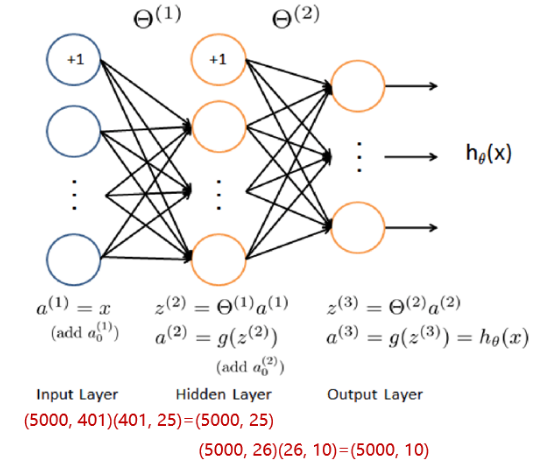

In [30]:
# 定义激活函数
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [31]:
# 输入层
a1 = X

In [32]:
# 隐藏层
z2 = X @theta1.T
a2 = sigmoid(z2)
a2.shape

(5000, 25)

In [33]:
# 输出层
a2 = np.insert(a2,0,values=1,axis=1)
print(a2.shape)

z3 = a2 @ theta2.T
a3 = sigmoid(z3)
print(a3.shape)

(5000, 26)
(5000, 10)


## 4.计算分类准确率

上一步得到的a3维度是(5000, 10)，即5000个样本，每个样本都输出10个预测输出（概率值）

In [35]:
# 得到y的预测值
y_pred = np.argmax(a3,axis=1)
y_pred = y_pred + 1

# 得分
acc =  np.mean(y_pred == y)
acc

0.9752